## Convolution Neural Network for Image Classification

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

170500096/170498071 [==============================] - 64s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

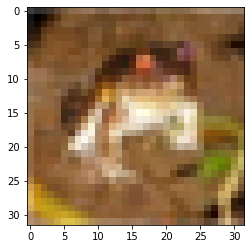

In [8]:
plt.imshow(x_train[0])
#frog

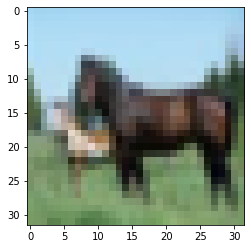

In [9]:
plt.imshow(x_train[12])
#horse

### Data Preprocessing

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train[0].shape

(32, 32, 3)

In [12]:
x_train.max()

255

In [13]:
x_train = x_train/225

In [14]:
x_test = x_test/255

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(50000, 1)

In [19]:
y_train[0]

array([6], dtype=uint8)

In [20]:
y_cat_train = to_categorical(y_train,10)

In [21]:
y_cat_train.shape

(50000, 10)

In [22]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
y_cat_test = to_categorical(y_test,10)

###  Training the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total para

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [28]:
model.fit(x_train,y_cat_train,epochs=50,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.5218 - acc: 0.4559 - val_loss: 1.3853 - val_acc: 0.4917
Epoch 2/50
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.1730 - acc: 0.5873 - val_loss: 1.2096 - val_acc: 0.5706
Epoch 3/50
50000/50000 [==============================] - 77s 2ms/sample - loss: 1.0276 - acc: 0.6412 - val_loss: 1.0853 - val_acc: 0.6116
Epoch 4/50
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.9257 - acc: 0.6814 - val_loss: 1.0030 - val_acc: 0.6488
Epoch 5/50
50000/50000 [==============================] - 81s 2ms/sample - loss: 0.8477 - acc: 0.7084 - val_loss: 1.1026 - val_acc: 0.6169
Epoch 6/50
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.7831 - acc: 0.7328 - val_loss: 1.0438 - val_acc: 0.6448
Epoch 7/50
50000/50000 [==============================] - 65s 1ms/sa

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,acc,val_loss,val_acc
0,1.521751,0.45592,1.385302,0.4917
1,1.172985,0.58734,1.209593,0.5706
2,1.027626,0.64124,1.085310,0.6116
3,0.925658,0.68144,1.002951,0.6488
4,0.847702,0.70838,1.102605,0.6169


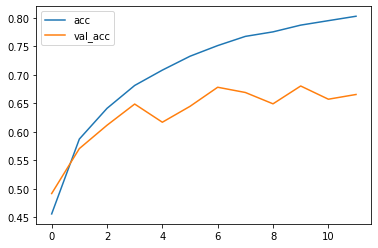

In [32]:
losses[['acc','val_acc']].plot()

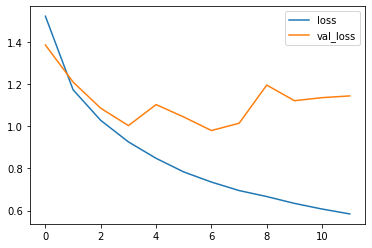

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
model.metrics_names

['loss', 'acc']

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'acc']
[1.1437864176750183, 0.6656]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1000
           1       0.69      0.89      0.77      1000
           2       0.70      0.43      0.53      1000
           3       0.47      0.53      0.50      1000
           4       0.74      0.50      0.60      1000
           5       0.51      0.62      0.56      1000
           6       0.61      0.86      0.71      1000
           7       0.80      0.68      0.73      1000
           8       0.85      0.68      0.76      1000
           9       0.83      0.70      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.66     10000
weighted avg       0.69      0.67      0.66     10000



In [38]:
confusion_matrix(y_test,predictions)

array([[759,  55,  24,  28,   7,  15,  26,  10,  47,  29],
       [ 15, 887,   4,  13,   1,   8,  20,   0,   8,  44],
       [ 86,  17, 430, 101,  48, 137, 137,  22,  12,  10],
       [ 27,  30,  36, 533,  48, 180, 105,  26,   4,  11],
       [ 37,  13,  54,  98, 500,  82, 140,  65,   9,   2],
       [ 26,   9,  25, 188,  30, 625,  57,  31,   3,   6],
       [  9,   7,  13,  59,   8,  33, 863,   2,   3,   3],
       [ 35,   7,  18,  65,  29, 104,  40, 680,   7,  15],
       [118,  97,  10,  34,   4,  10,  14,   5, 682,  26],
       [ 30, 170,   4,  26,   1,  20,  19,  10,  23, 697]])

/Users/jaydip/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


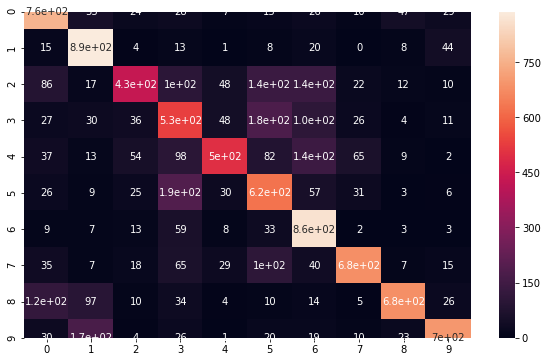

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

### Predicting an image

In [72]:
my_image = x_test[10]

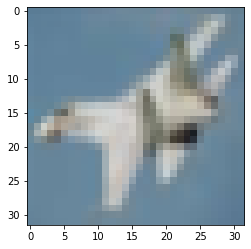

In [73]:
plt.imshow(my_image)

In [74]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([0])

In [ ]:
#Its a airplane